In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [12]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        last_acc = test_acc.mean()[-1] * 100
        last_std = 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100
        best_acc = test_acc.max(axis=1).mean() * 100
        best_std = 1.96 * test_acc.max(axis=1).std() / np.sqrt(600) * 100
        epg = best_acc - last_acc
        fmt = "{:.2f} ± {:.2f} | {:.2f} ± {:.2f} | {:.2f}%".format(last_acc, last_std, best_acc, best_std, epg)
        result.loc[data][bs] = fmt
display(result)

,1shot,5shot
mini_test,56.47 ± 0.80 | 59.62 ± 0.76 | 3.15%,85.33 ± 0.30 | 86.00 ± 0.23 | 0.67%
crop,73.12 ± 0.88 | 77.51 ± 0.81 | 4.39%,91.50 ± 0.49 | 93.33 ± 0.43 | 1.83%
euro,64.72 ± 0.88 | 69.10 ± 0.84 | 4.38%,84.08 ± 0.60 | 86.47 ± 0.56 | 2.39%
isic,29.39 ± 0.53 | 34.69 ± 0.48 | 5.30%,40.39 ± 0.55 | 45.01 ± 0.50 | 4.63%
chest,21.45 ± 0.31 | 27.42 ± 0.26 | 5.97%,26.75 ± 0.43 | 32.56 ± 0.36 | 5.81%


/tmp/ipykernel_2271/4199279936.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


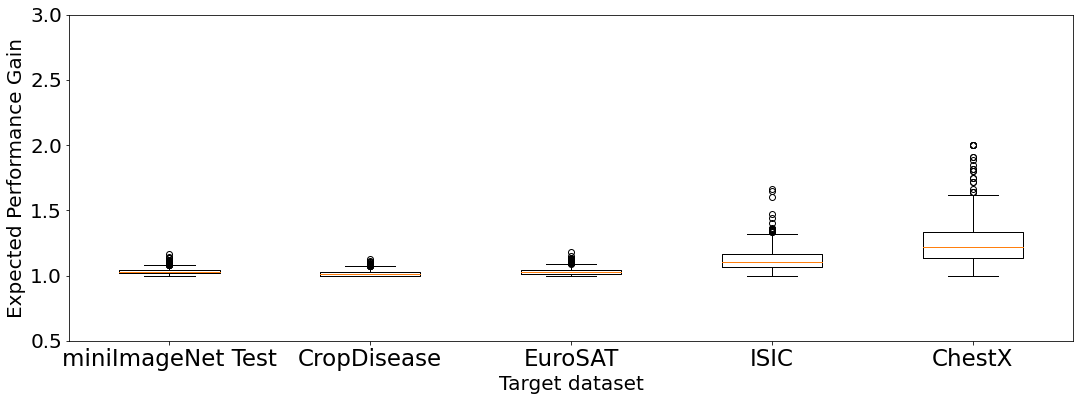

In [17]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 3.5, step=0.5) ,fontsize = 20)
plt.show()

/tmp/ipykernel_2271/3231687406.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


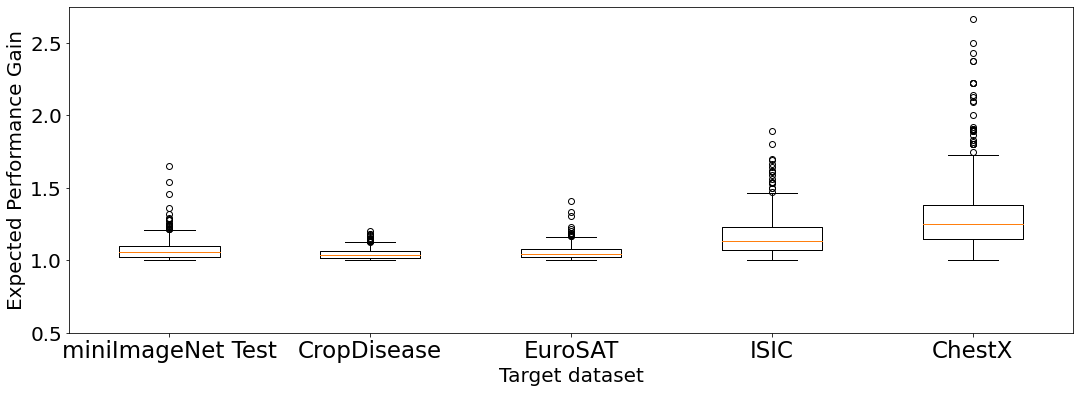

In [16]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_mixup_v1_30_70.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 3.0, step=0.5) ,fontsize = 20)
plt.show()

/tmp/ipykernel_2271/1654437404.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


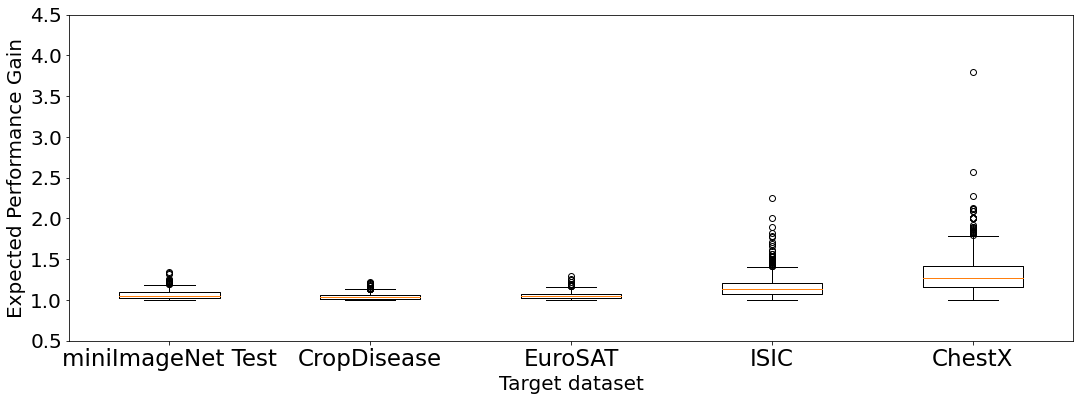

In [18]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 5.0, step=0.5) ,fontsize = 20)
plt.show()